In [10]:
from datetime import datetime
import pandas as pd
from pandas_datareader.data import DataReader
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

plt.style.use('seaborn')

In [6]:
drugs = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
drugs.set_index('date', inplace=True)
drugs.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


Text(0.5, 0.98, 'Drug sales')

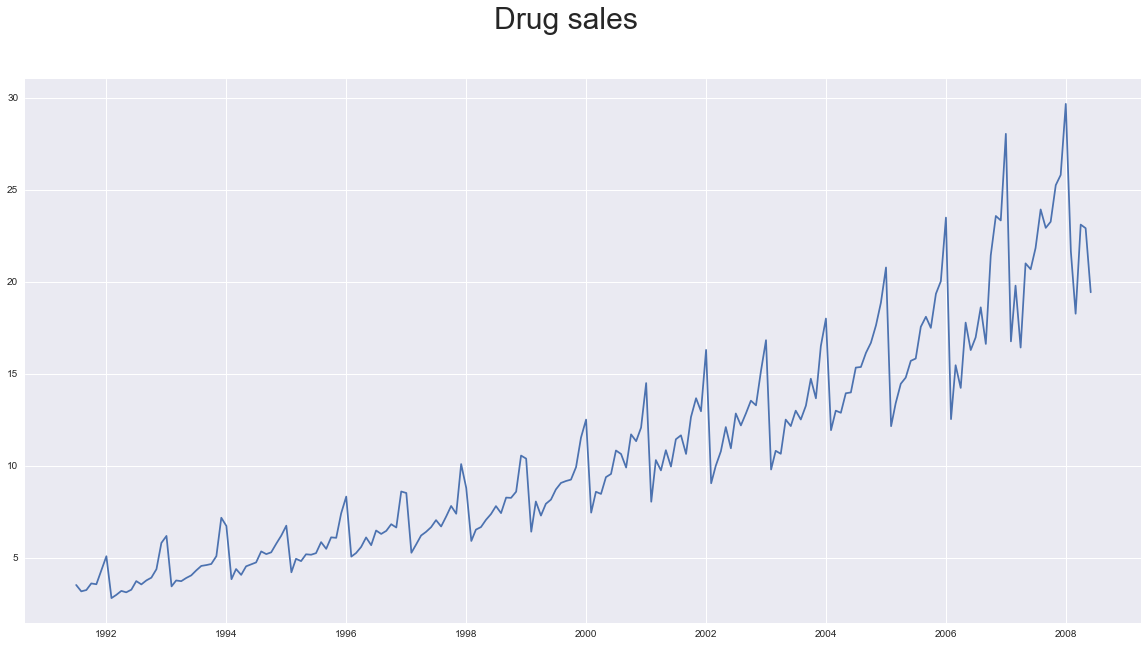

In [7]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(drugs.index, drugs['value'])
fig.suptitle('Drug sales', fontsize=30)

In [8]:
dateparse = lambda x: datetime.strptime(x, '%d.%m.%Y')
energy = pd.read_csv('energy.csv', header=0, sep=';', parse_dates=['Month'], date_parser = dateparse)
energy['T'] = energy['Total Primary Energy Production'].apply(lambda x: float(str(x).replace(',','.')))
#energy.sort_values(by=['YYYYMM'], inplace=True)
energy['diff'] = energy['T'] - energy['T'].shift(1)
energy.set_index('Month', inplace=True)
energy.dropna(inplace=True)
energy.head()

,Total Fossil Fuels Production,Nuclear Electric Power Production,Total Renewable Energy Production,Total Primary Energy Production,Primary Energy Imports,Primary Energy Exports,Primary Energy Net Imports,Primary Energy Stock Change and Other,Total Fossil Fuels Consumption,Nuclear Electric Power Consumption,Total Renewable Energy Consumption,Total Primary Energy Consumption,T,diff
Month,,,,,,,,,,,,,,
1973-02-01,"4,729582","0,064634","0,3609","5,155115","1,168005","0,120883","1,047122","0,390129","6,163095","0,064634","0,3609","6,592366",5.155115,-0.249600
1973-03-01,"4,946902","0,072494","0,400161","5,419556","1,309473","0,13995","1,169523","-0,06764","6,044647","0,072494","0,400161","6,521439",5.419556,0.264441
1973-04-01,"4,716271","0,06407","0,38047","5,160812","1,085169","0,194185","0,890984","-0,110067","5,493184","0,06407","0,38047","5,941729",5.160812,-0.258744
1973-05-01,"4,956995","0,062111","0,392141","5,411246","1,162804","0,196775","0,966029","-0,305335","5,613551","0,062111","0,392141","6,07194",5.411246,0.250434
1973-06-01,"4,716096","0,073968","0,377232","5,167296","1,129614","0,178871","0,950743","-0,315356","5,347479","0,073968","0,377232","5,802683",5.167296,-0.243950


Text(0.5, 0.98, 'Total USA energy production')

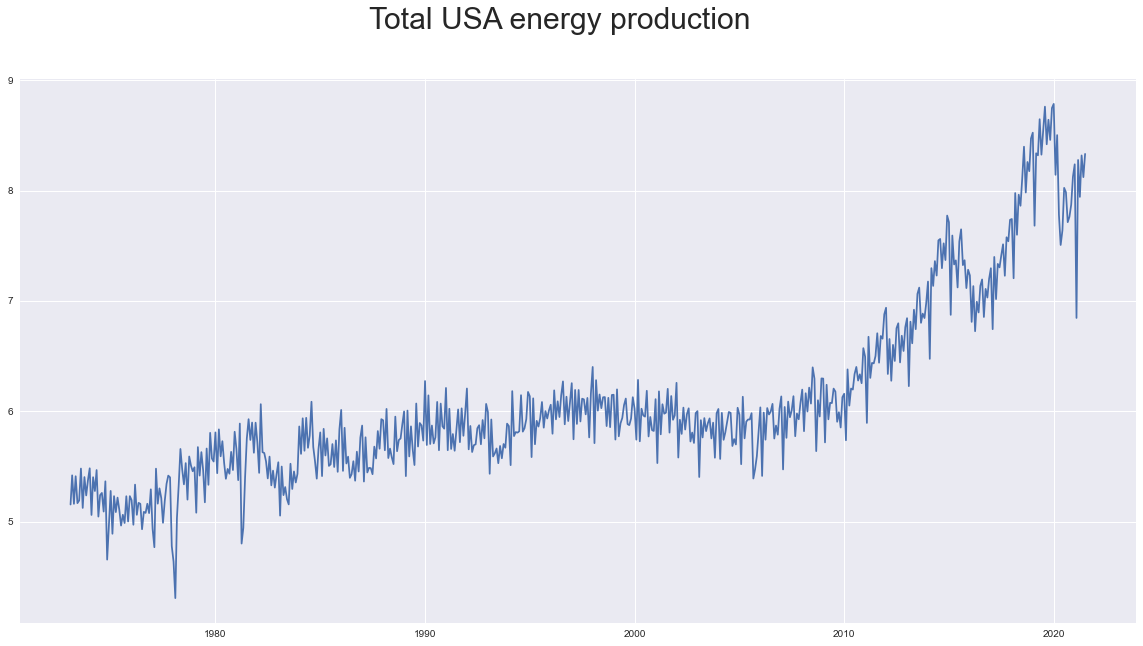

In [9]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(energy.index, energy['T'])
fig.suptitle('Total USA energy production', fontsize=30)

In [11]:
dji = DataReader("^DJI",  "yahoo", datetime(2000,1,1), datetime(2021,1,1))
dji['Lag_1'] = dji['Adj Close'].shift(1)
dji['Delta'] = dji['Adj Close'].shift(1) - dji['Adj Close'].shift(-1)
dji.dropna(inplace=True)

Text(0.5, 0.98, 'Dow Jones Industrial')

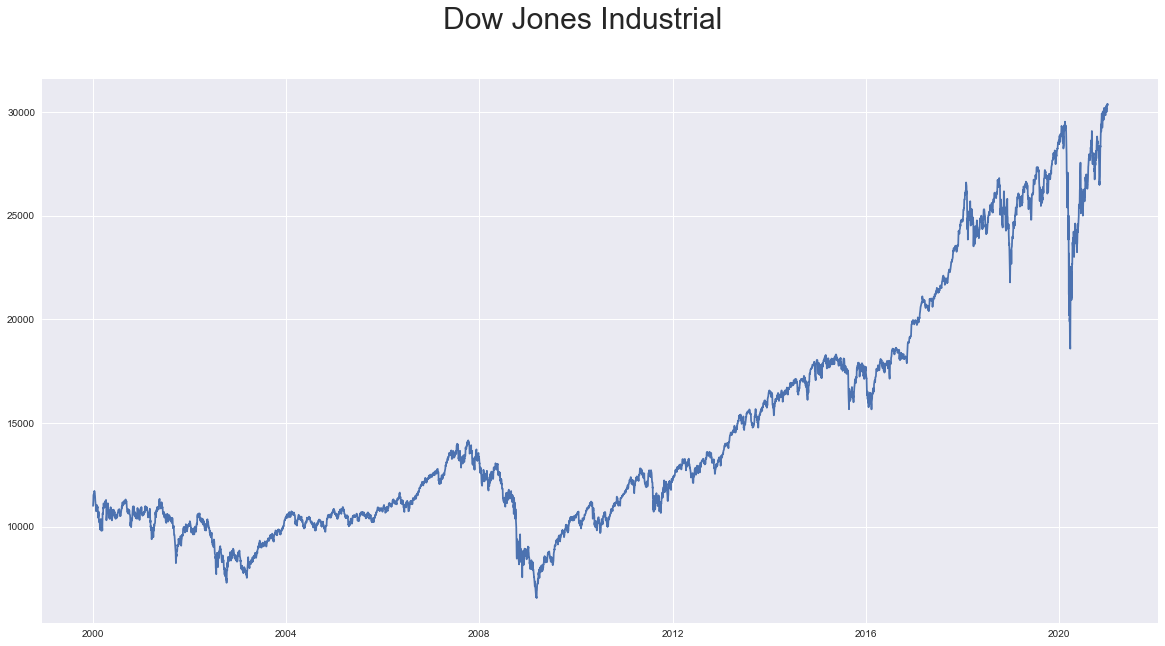

In [12]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(dji.index, dji['Adj Close'])
fig.suptitle('Dow Jones Industrial', fontsize=30)

## Линейная регрессия на время

In [13]:
drugs['Time'] = np.arange(len(drugs.index))

In [75]:
X = drugs.loc[:, ['Time']]
y = drugs.loc[:, 'value']
model = LinearRegression()
model.fit(X, y)
pred = pd.Series(model.predict(X), index=X.index)

Text(0.5, 0.98, 'Drug sales linear regression on time')

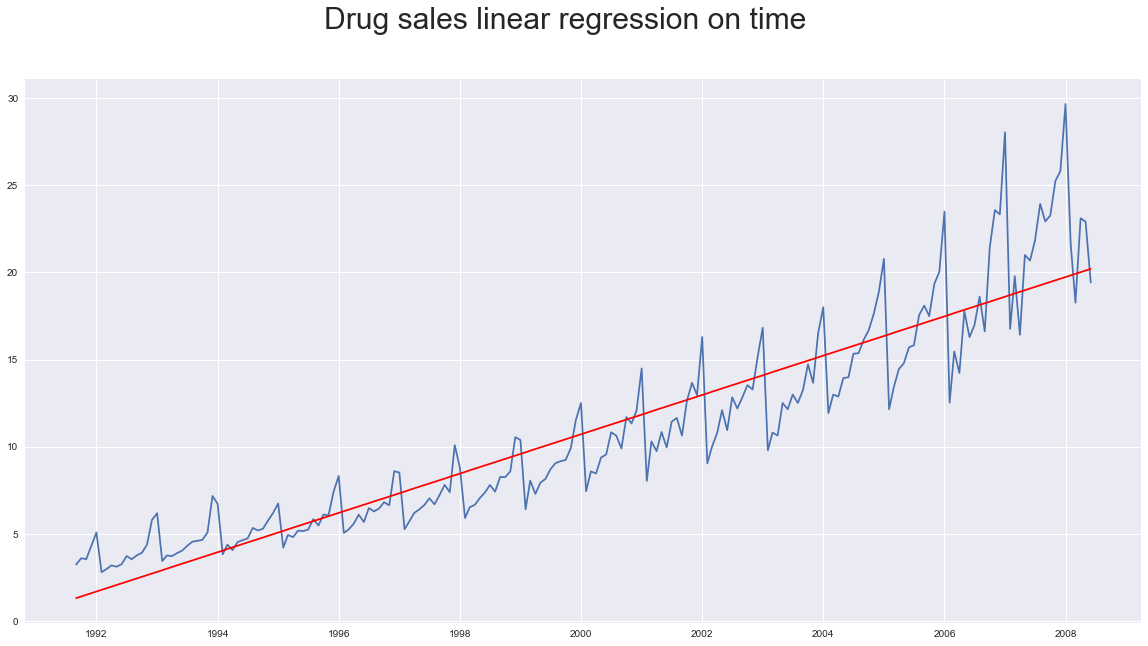

In [76]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(drugs.index, drugs['value'])
ax.plot(pred.index, pred, color='red')
fig.suptitle('Drug sales linear regression on time', fontsize=30)

In [28]:
energy['Time'] = np.arange(len(energy.index))

In [72]:
X = energy.loc[:, ['Time']]
y = energy.loc[:, 'T']
model = LinearRegression()
model.fit(X, y)
pred = pd.Series(model.predict(X), index=X.index)

Text(0.5, 0.98, 'Total USA energy production linear regression on time')

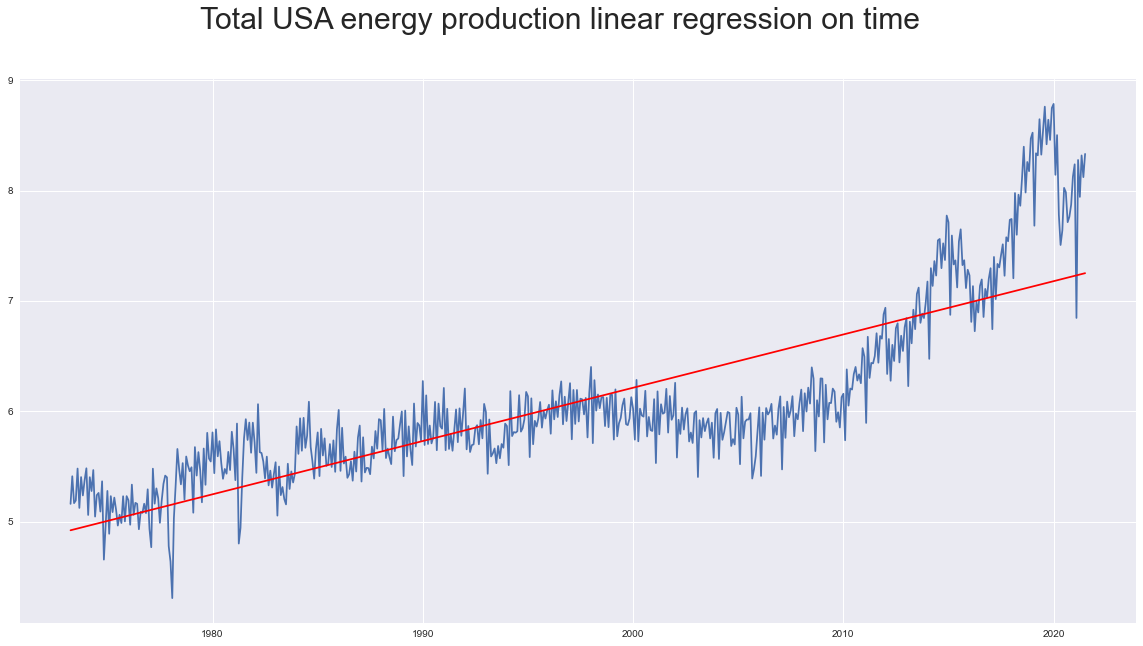

In [73]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(energy.index, energy['T'])
ax.plot(pred.index, pred, color='red')
fig.suptitle('Total USA energy production linear regression on time', fontsize=30)

In [31]:
dji['Time'] = np.arange(len(dji.index))

In [69]:
X = dji.loc[:, ['Time']]
y = dji.loc[:, 'Adj Close']
model = LinearRegression()
model.fit(X, y)
pred = pd.Series(model.predict(X), index=X.index)

Text(0.5, 0.98, 'Dow Jones Industrial linear regression on time')

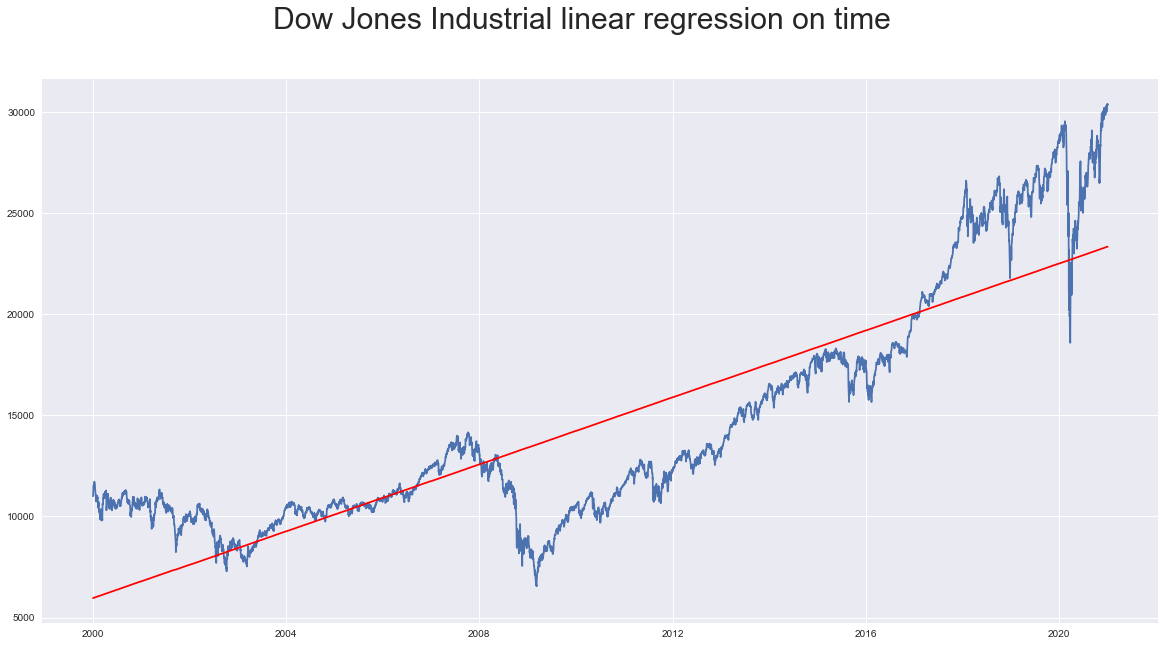

In [70]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(dji.index, dji['Adj Close'])
ax.plot(pred.index, pred, color='red')
fig.suptitle('Dow Jones Industrial linear regression on time', fontsize=30)

## Сдвиги ряда в качестве признака

In [53]:
drugs['Lag_1'] = drugs['value'].shift(1)
drugs.dropna(inplace=True)

In [89]:
X = drugs.loc[:, ['Lag_1']]
y = drugs.loc[:, 'value']
y, X = y.align(X, join='inner')
model.fit(X, y)
preds = pd.Series(model.predict(X), index=X.index)

Text(0.5, 0.98, 'Drug sales vs lag 1')

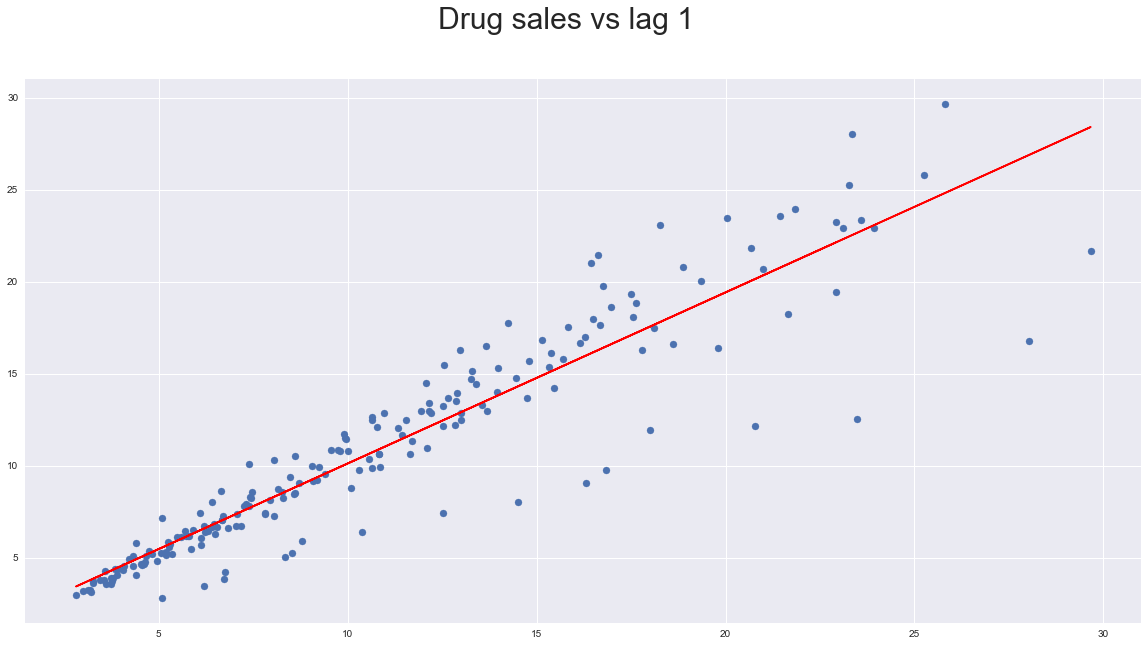

In [90]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.scatter(X['Lag_1'], y)
ax.plot(X['Lag_1'], preds, color='red')
fig.suptitle('Drug sales vs lag 1', fontsize=30)

Text(0.5, 0.98, 'Drug sales linear regression on lag 1')

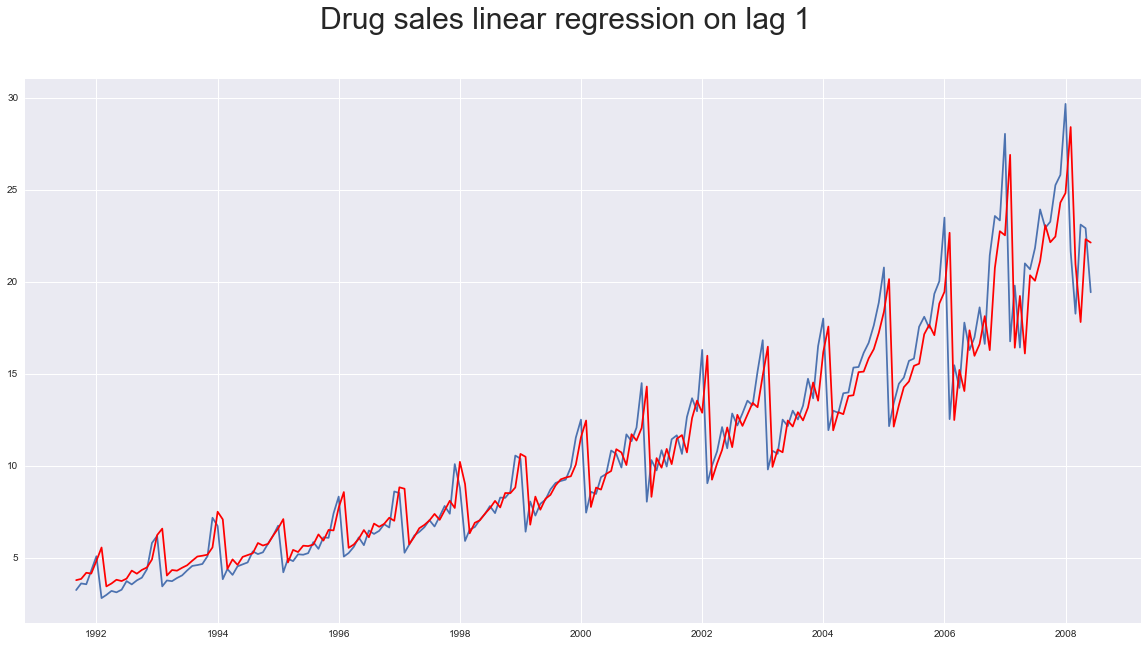

In [91]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(X.index, y)
ax.plot(X.index, preds, color='red')
fig.suptitle('Drug sales linear regression on lag 1', fontsize=30)

In [92]:
energy['Lag_1'] = energy['T'].shift(1)
energy.dropna(inplace=True)

In [113]:
X = energy.loc[:, ['Lag_1']]
y = energy.loc[:, 'T']
y, X = y.align(X, join='inner')
model.fit(X, y)
preds = pd.Series(model.predict(X), index=X.index)

Text(0.5, 0.98, 'Total USA energy production vs lag 1')

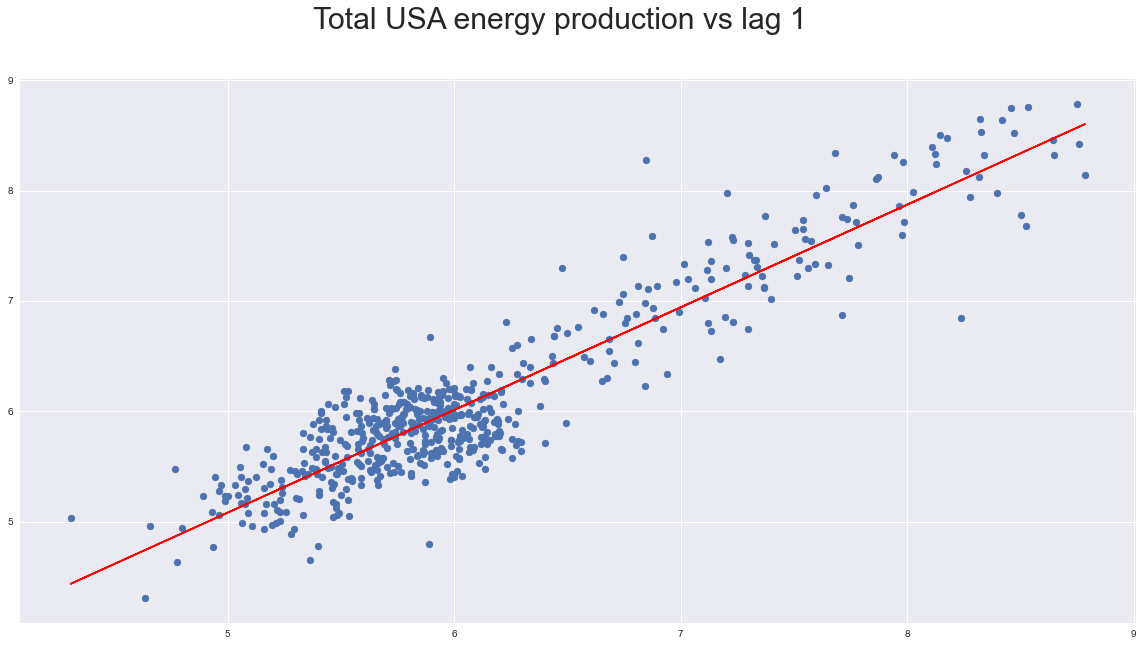

In [116]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.scatter(X['Lag_1'], y)
ax.plot(X['Lag_1'], preds, color='red')
fig.suptitle('Total USA energy production vs lag 1', fontsize=30)

Text(0.5, 0.98, 'Total USA energy production linear regression on lag 1')

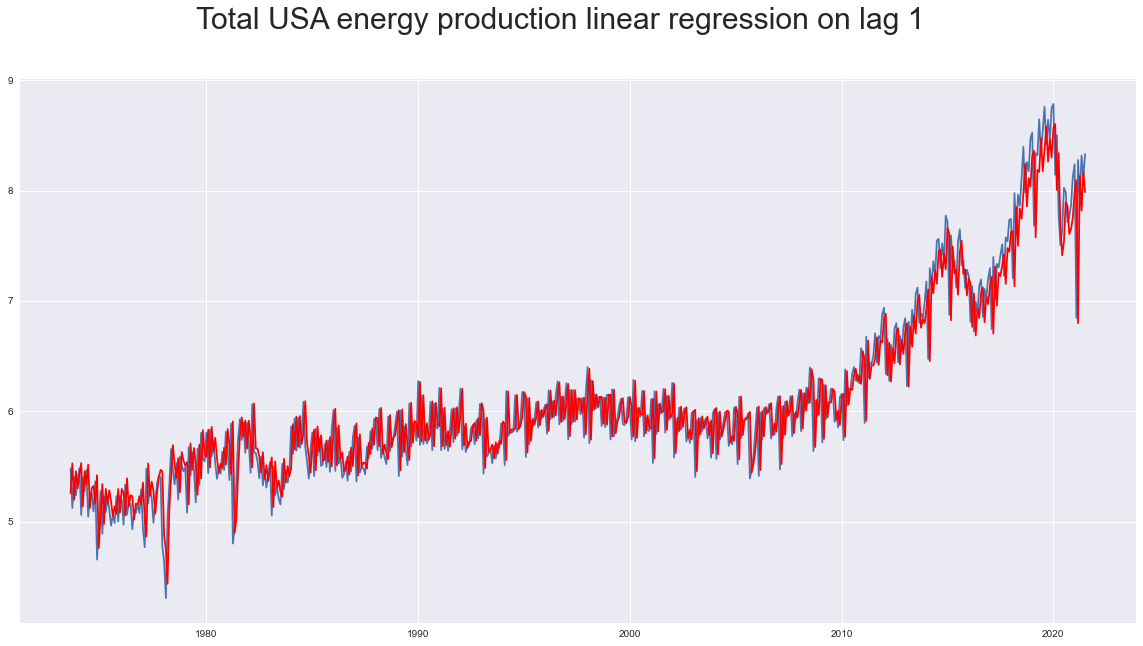

In [115]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(X.index, y)
ax.plot(X.index, preds, color='red')
fig.suptitle('Total USA energy production linear regression on lag 1', fontsize=30)

In [96]:
X = dji.loc[:, ['Lag_1']]
y = dji.loc[:, 'Adj Close']
model = LinearRegression()
model.fit(X, y)
pred = pd.Series(model.predict(X), index=X.index)

Text(0.5, 0.98, 'Dow Jones Industrial linear regression on time')

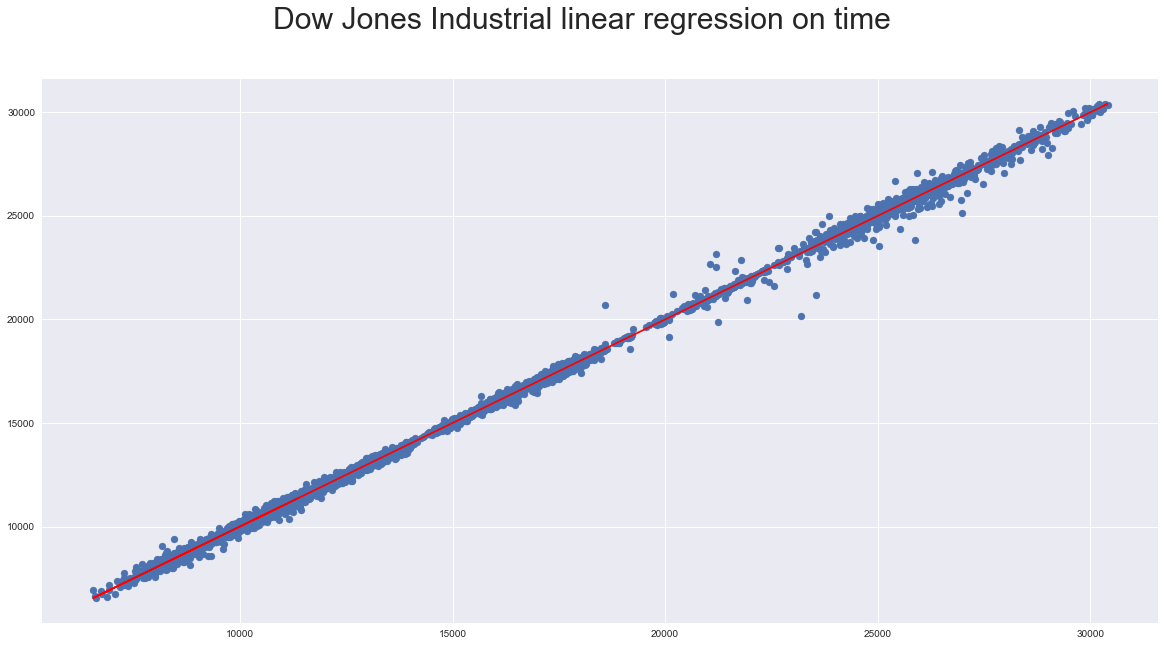

In [100]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.scatter(X['Lag_1'], y)
ax.plot(X['Lag_1'], pred, color='red')
fig.suptitle('Dow Jones Industrial linear regression on time', fontsize=30)

Text(0.5, 0.98, 'Dow Jones Industrial linear regression on time')

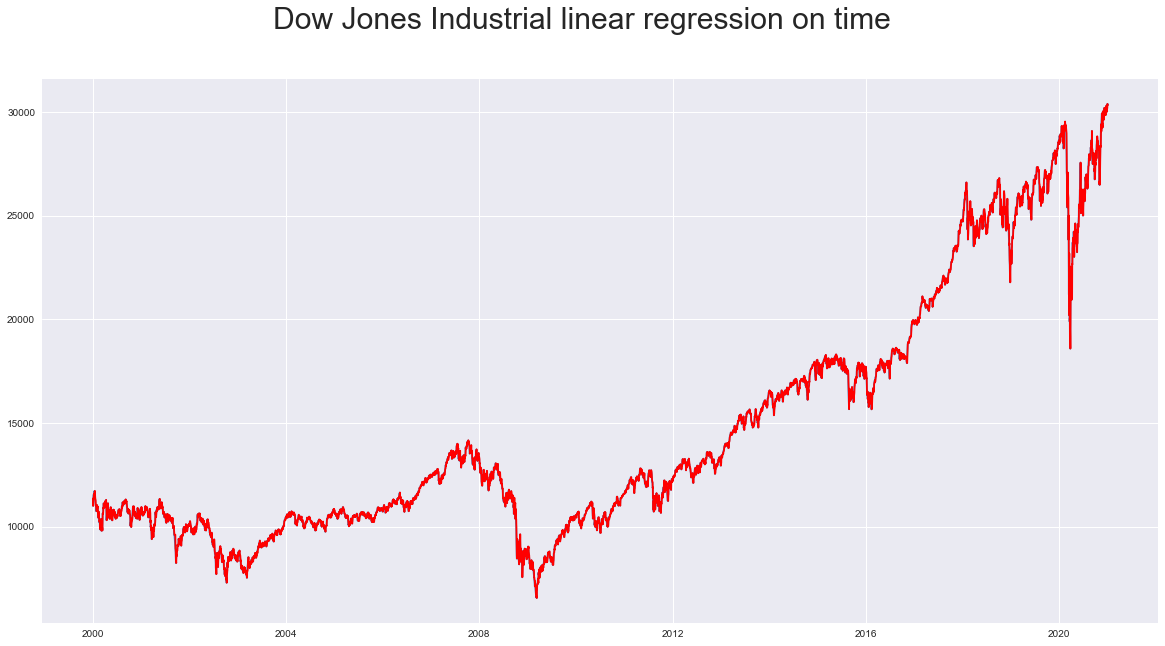

In [101]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(X.index, dji['Adj Close'])
ax.plot(pred.index, pred, color='red')
fig.suptitle('Dow Jones Industrial linear regression on time', fontsize=30)

## Автокорреляция

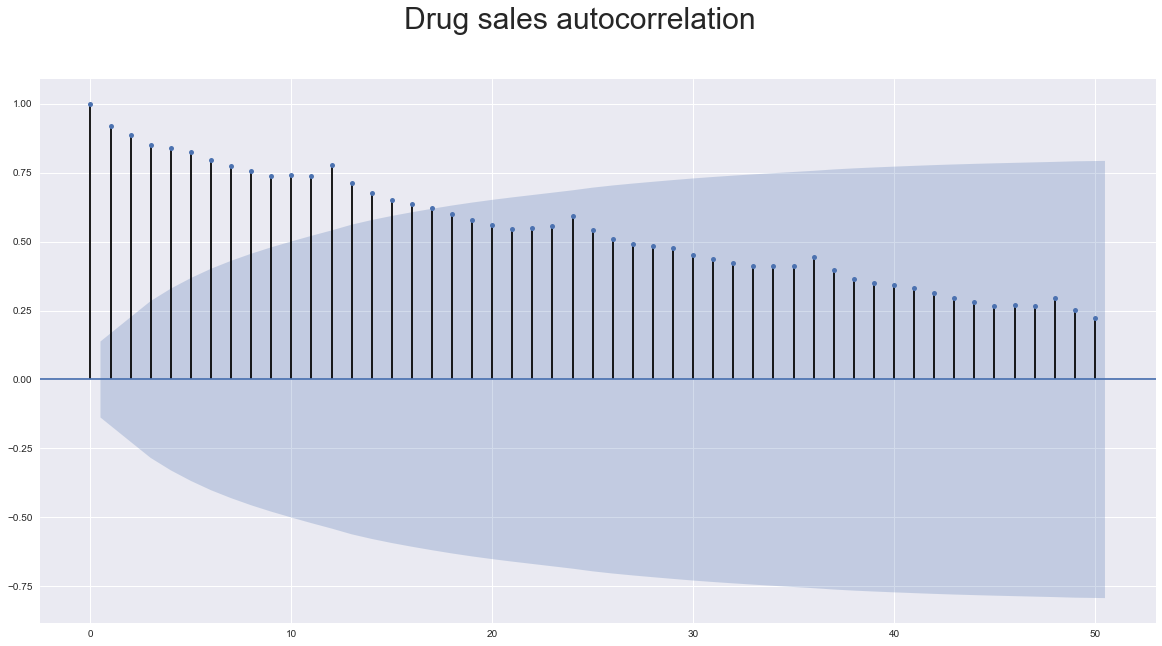

In [105]:
fig, ax = plt.subplots(figsize = (20, 10))
plot_acf(drugs['value'], lags = 50, title = '', ax=ax)
plt.suptitle('Drug sales autocorrelation', fontsize=30)
plt.show()

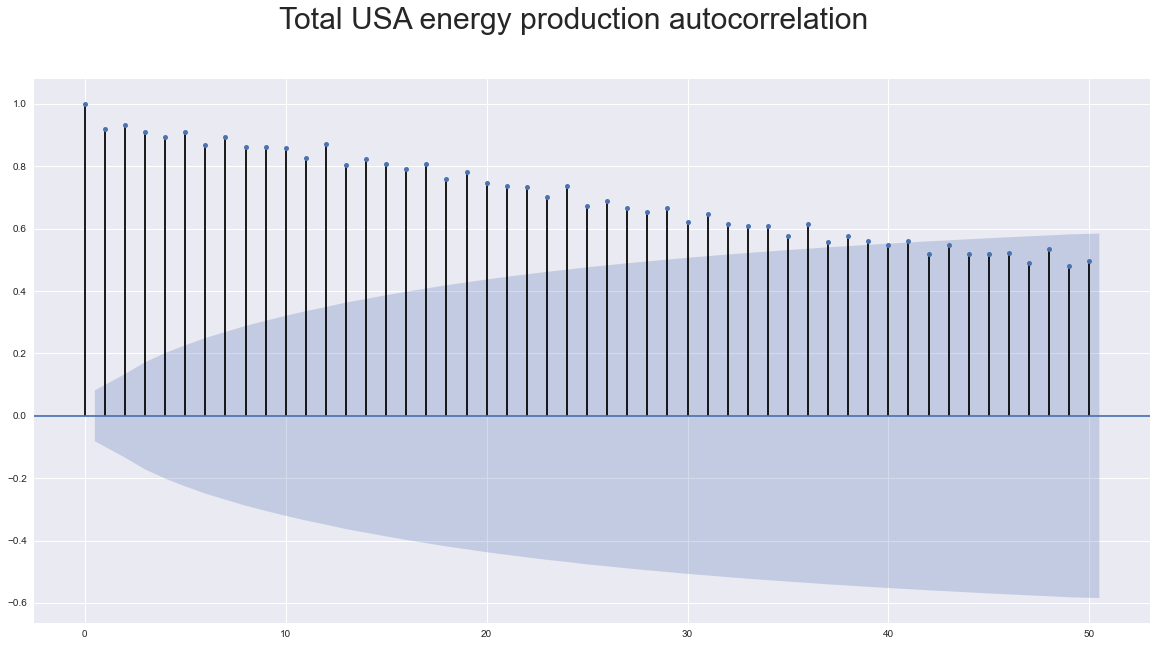

In [112]:
fig, ax = plt.subplots(figsize = (20, 10))
plot_acf(energy['T'], lags = 50, title = '', ax=ax)
plt.suptitle('Total USA energy production autocorrelation', fontsize=30)
plt.show()

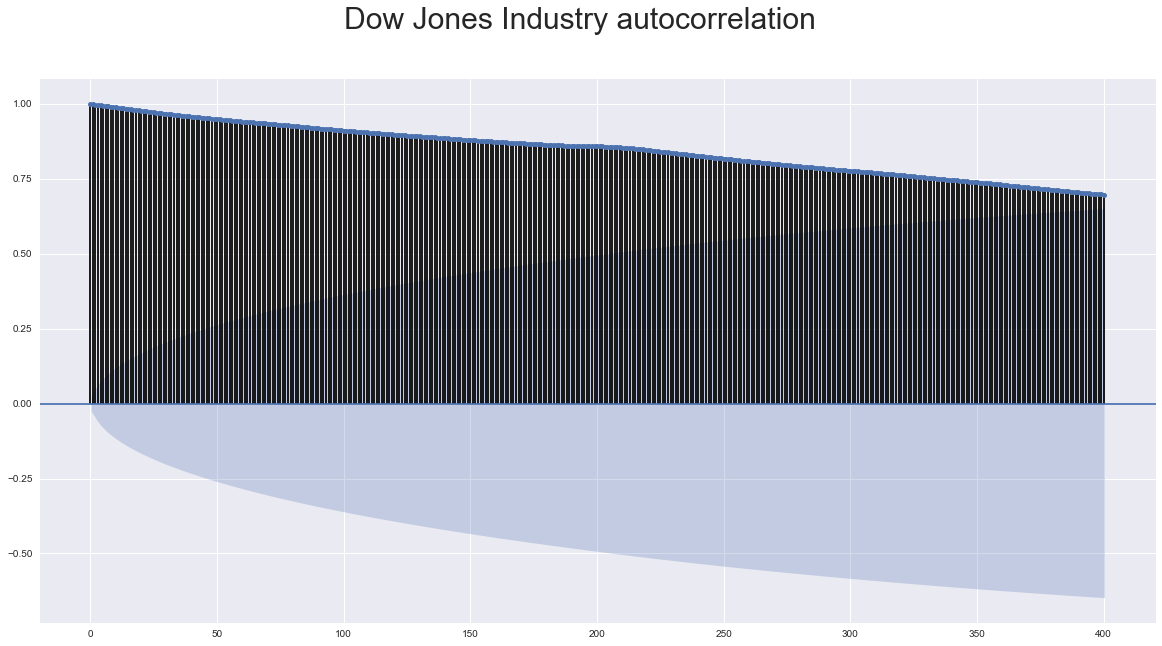

In [190]:
fig, ax = plt.subplots(figsize = (20, 10))
plot_acf(dji['Adj Close'], lags = 400, title = '', ax=ax)
plt.suptitle('Dow Jones Industry autocorrelation', fontsize=30)
plt.show()

## Дифференцирование рядов

In [108]:
drugs['diff'] = drugs['value'] - drugs['value'].shift(1)
drugs.dropna(inplace=True)

Text(0.5, 0.98, 'Drugs sales monthly difference')

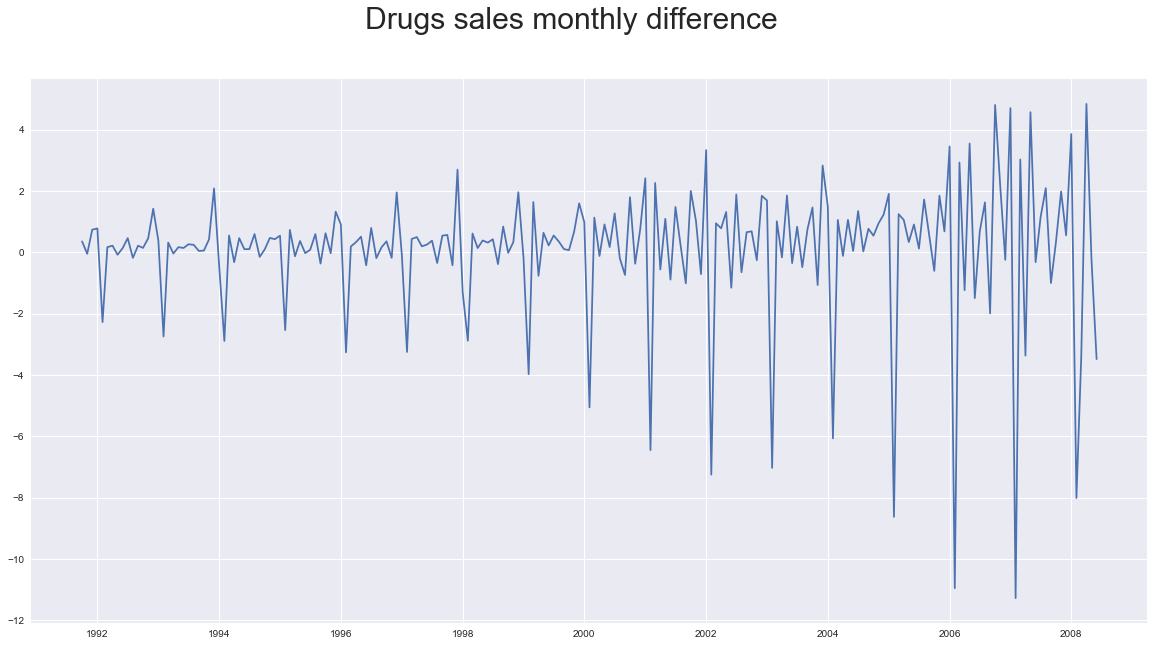

In [123]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(drugs.index, drugs['diff'])
fig.suptitle('Drugs sales monthly difference', fontsize=30)

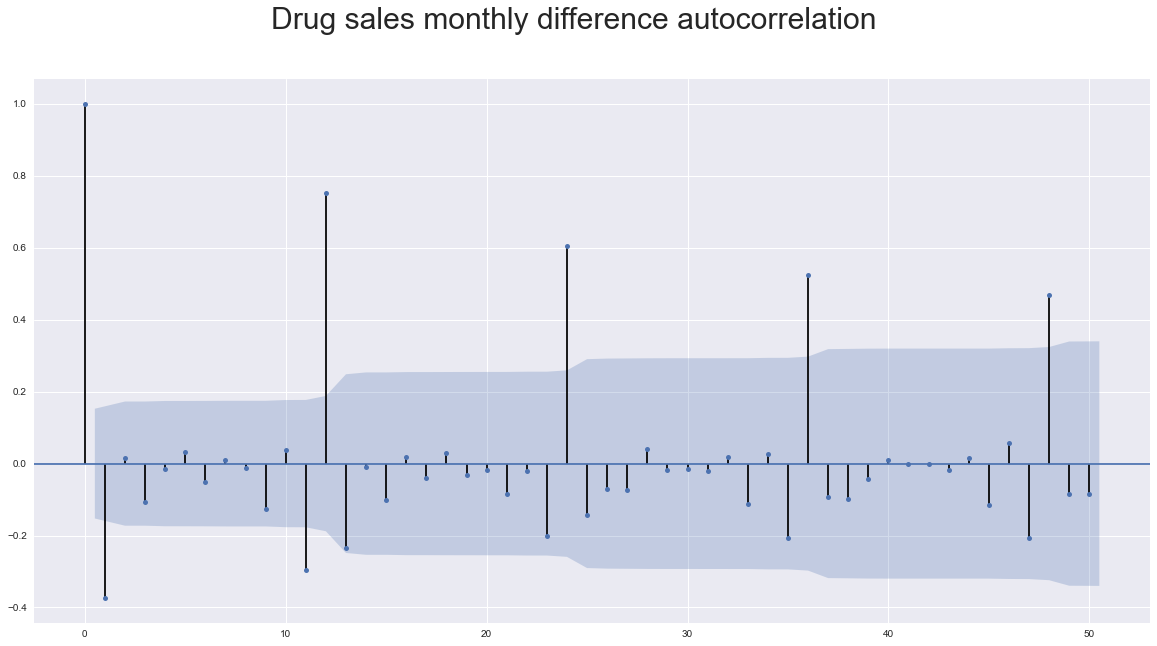

In [182]:
fig, ax = plt.subplots(figsize = (20, 10))
plot_acf(drugs['diff'], lags = 50, title = '', ax=ax)
plt.suptitle('Drug sales monthly difference autocorrelation', fontsize=30)
plt.show()

In [138]:
energy['diff'] = energy['T'] - energy['T'].shift(1)
energy.dropna(inplace=True)

Text(0.5, 0.98, 'Total USA energy production monthly difference')

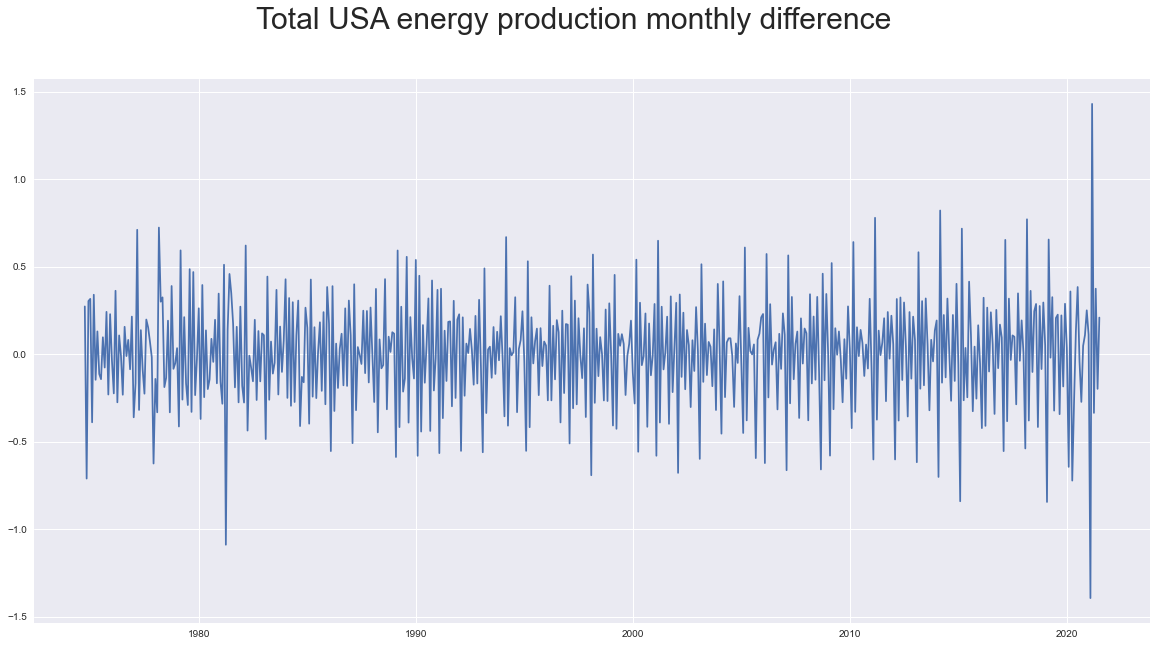

In [140]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(energy.index, energy['diff'])
fig.suptitle('Total USA energy production monthly difference', fontsize=30)

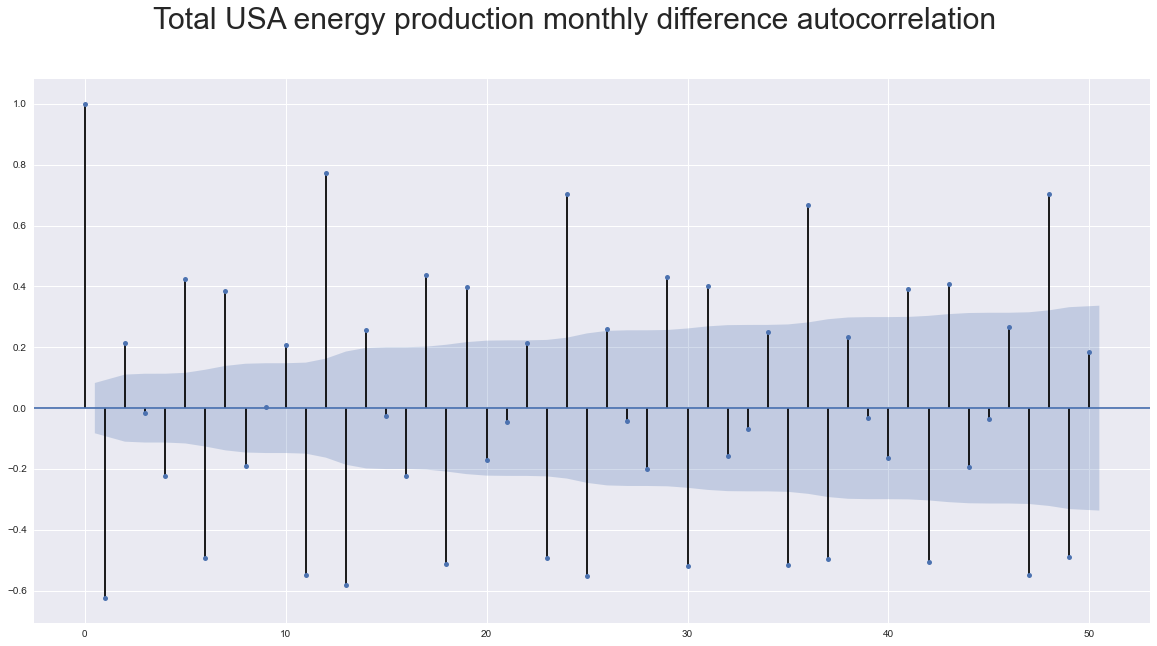

In [183]:
fig, ax = plt.subplots(figsize = (20, 10))
plot_acf(energy['diff'], lags = 50, title = '', ax=ax)
plt.suptitle('Total USA energy production monthly difference autocorrelation', fontsize=30)
plt.show()

In [120]:
dji['diff'] = dji['Adj Close'] - dji['Adj Close'].shift(1)
dji.dropna(inplace=True)

Text(0.5, 0.98, 'Dow Jones Industry daily difference')

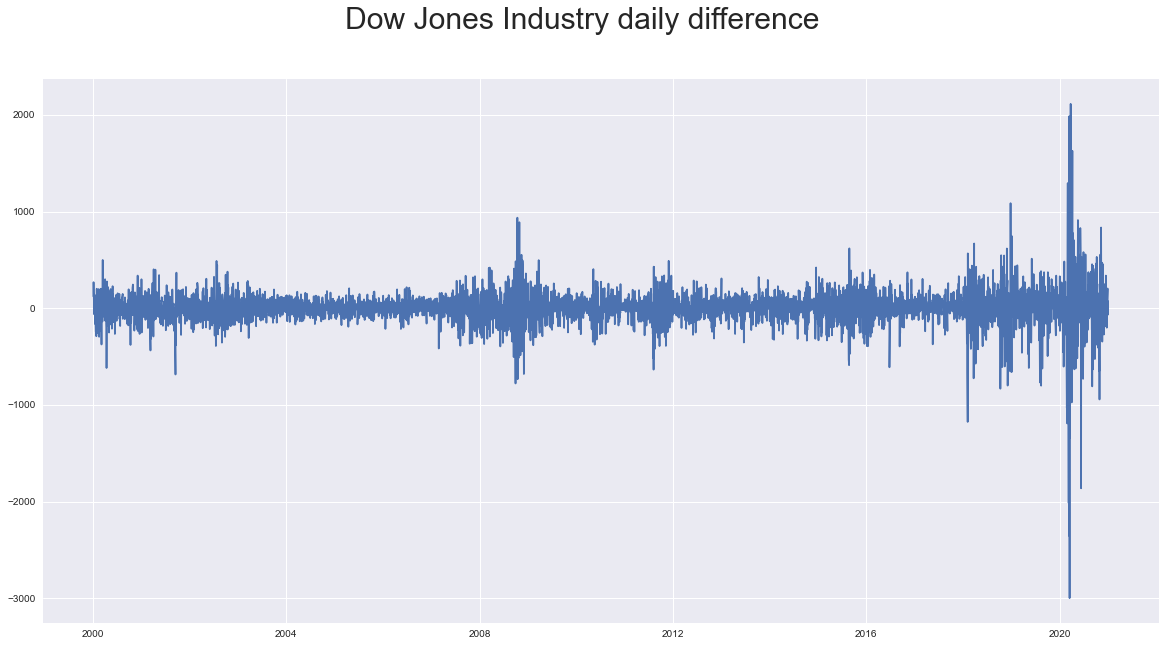

In [121]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(dji.index, dji['diff'])
fig.suptitle('Dow Jones Industry daily difference', fontsize=30)

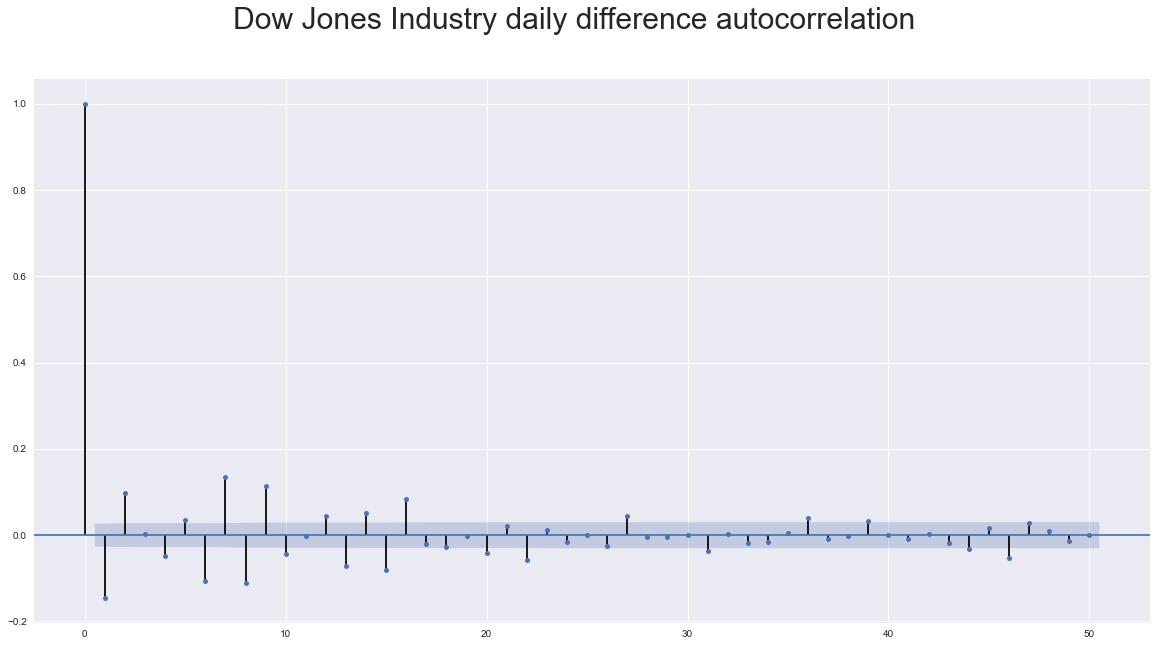

In [191]:
fig, ax = plt.subplots(figsize = (20, 10))
plot_acf(dji['diff'], lags = 50, title = '', ax=ax)
plt.suptitle('Dow Jones Industry daily difference autocorrelation', fontsize=30)
plt.show()

In [133]:
drugs['s_diff'] = drugs['value'] - drugs['value'].shift(12)
drugs.dropna(inplace=True)

Text(0.5, 0.98, 'Drugs sales yearly difference')

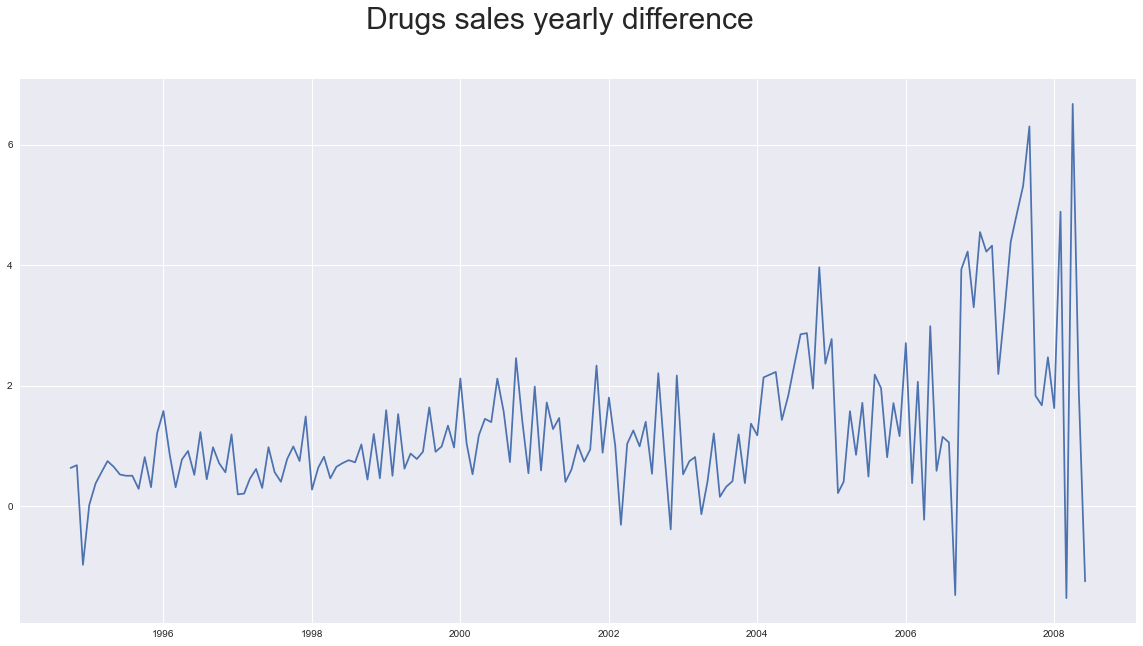

In [184]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(drugs.index, drugs['s_diff'])
fig.suptitle('Drugs sales yearly difference', fontsize=30)

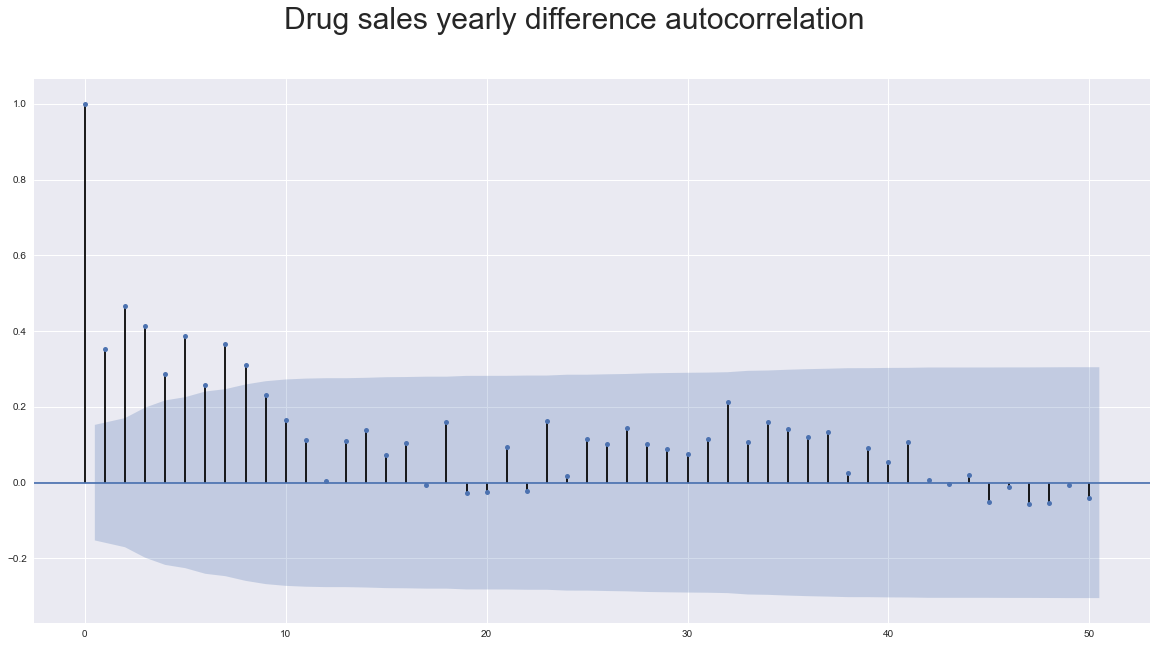

In [185]:
fig, ax = plt.subplots(figsize = (20, 10))
plot_acf(drugs['s_diff'], lags = 50, title = '', ax=ax)
plt.suptitle('Drug sales yearly difference autocorrelation', fontsize=30)
plt.show()

In [136]:
energy['s_diff'] = energy['T'] - energy['T'].shift(12)
energy.dropna(inplace=True)

Text(0.5, 0.98, 'Total USA energy production yearly difference')

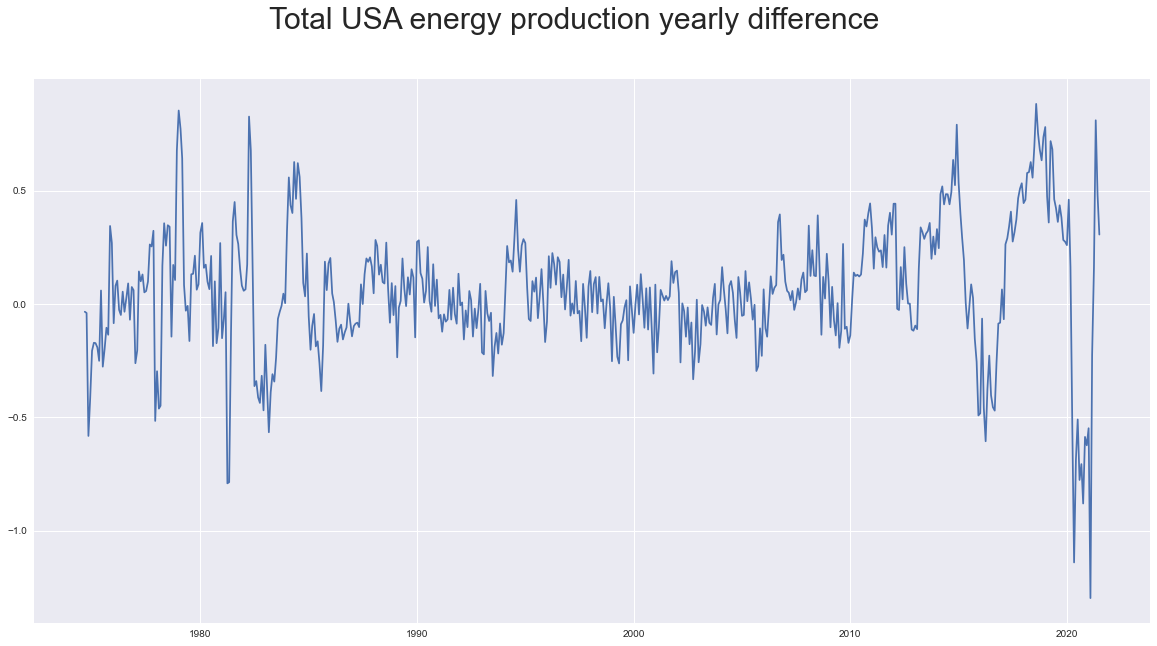

In [137]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(energy.index, energy['s_diff'])
fig.suptitle('Total USA energy production yearly difference', fontsize=30)

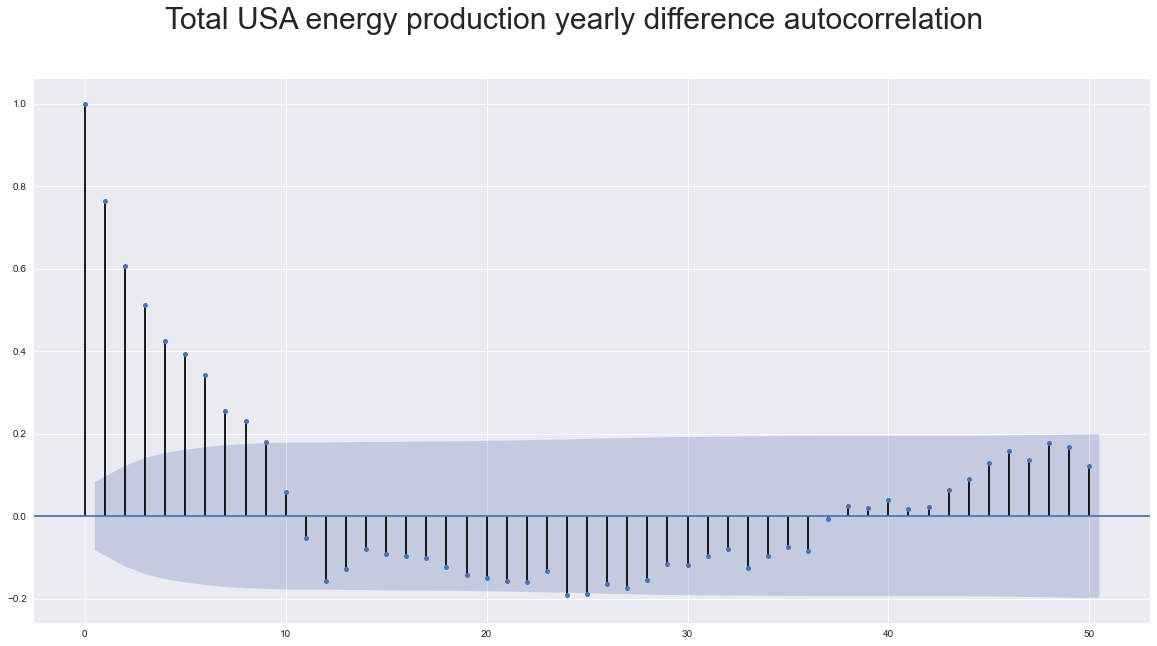

In [143]:
fig, ax = plt.subplots(figsize = (20, 10))
plot_acf(energy['s_diff'], lags = 50, title = '', ax=ax)
plt.suptitle('Total USA energy production yearly difference autocorrelation', fontsize=30)
plt.show()

In [147]:
drugs['ln_val'] = np.log(drugs['value'])

Text(0.5, 0.98, 'Ln of drug sales')

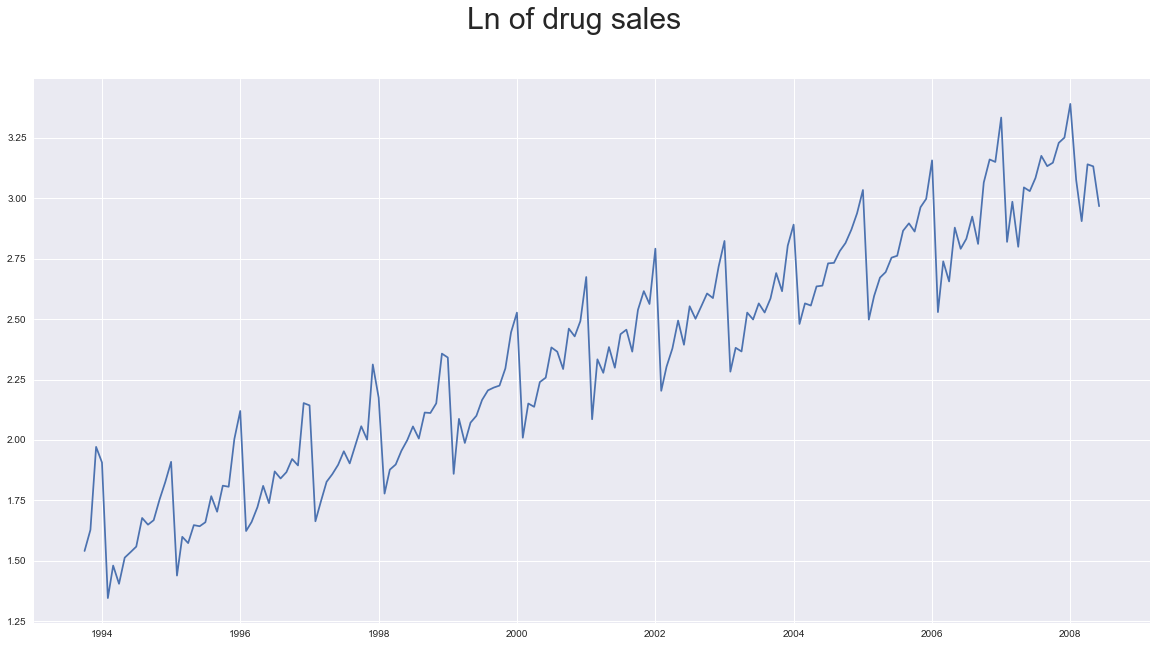

In [149]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(drugs.index, drugs['ln_val'])
fig.suptitle('Ln of drug sales', fontsize=30)

In [150]:
drugs['ln_s_diff'] = drugs['ln_val'] - drugs['ln_val'].shift(12)
drugs.dropna(inplace=True)

Text(0.5, 0.98, 'Ln of drug sales yearly difference')

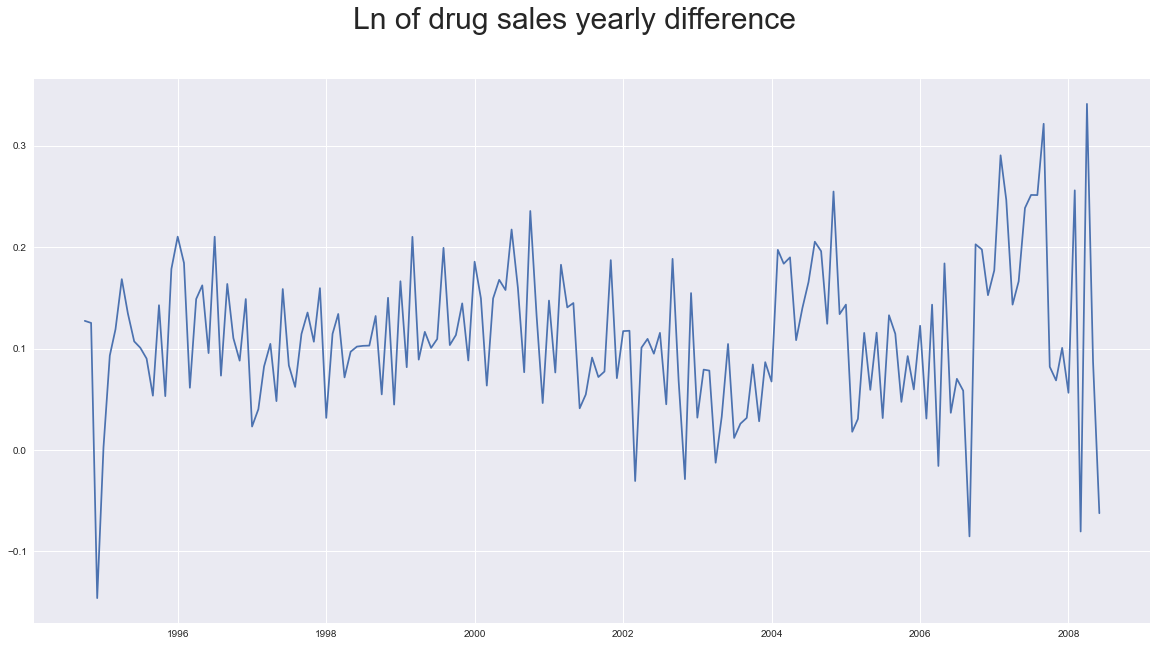

In [151]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(drugs.index, dru gs['ln_s_diff'])
fig.suptitle('Ln of drug sales yearly difference', fontsize=30)

In [189]:
kpss(drugs['s_diff'])

C:\Users\e.bulavko\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


(0.7486972994698213,
 0.01,
 14,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [186]:
kpss(drugs['ln_s_diff'])

C:\Users\e.bulavko\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\e.bulavko\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.09379784607062769,
 0.1,
 14,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [187]:
kpss(energy['s_diff'])

C:\Users\e.bulavko\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.23256093220542554,
 0.1,
 19,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [188]:
kpss(dji['diff'])

C:\Users\e.bulavko\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.32902591398152187,
 0.1,
 33,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})